In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Pclass','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'])

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

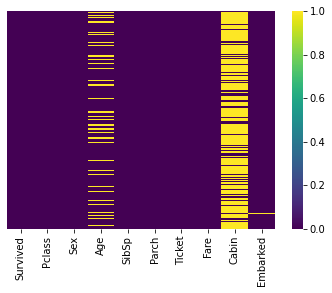

In [6]:
import seaborn as sns
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis')

# mean/median/mode 
the in this method the tha NAN values are present are filled with median value of particular column\

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)


In [8]:
impute_nan(df,'Age',df['Age'].median())

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,35.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [10]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


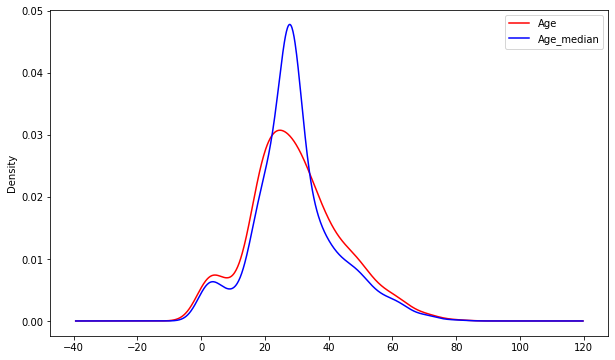

In [12]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
df['Age'].plot(kind='kde',ax=ax,color='r')
df['Age_median'].plot(kind='kde',ax=ax,color='b')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Random Sample Imputation
the random sample imputation is technique is where the random values are taken dataset and filled in NAN values


In [13]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Age_median      0
dtype: int64

In [14]:
df.isnull().std()

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.399210
SibSp         0.000000
Parch         0.000000
Ticket        0.000000
Fare          0.000000
Cabin         0.420397
Embarked      0.047351
Age_median    0.000000
dtype: float64

In [15]:
df['Cabin'].isnull().mean()

0.7710437710437711

In [16]:
df['Cabin'].isnull().sum()

687

In [17]:
df['Cabin'].dropna().sample()
# df['Cabin'].dropna() this deletes nan values "BUT" return values which are are not "NaN" in the column

177    C49
Name: Cabin, dtype: object

In [18]:
df['Cabin'].dropna().sample() 
# this return one of the values from group of values obtain from      df['Cabin'].dropna()

257    B77
Name: Cabin, dtype: object

In [19]:


df['Cabin'].dropna().sample(df['Cabin'].isnull().sum(),random_state=0,replace=True)

745    B22
248    D35
516    F33
835    E49
310    C54
      ... 
487    B37
329    B18
453    C92
782     D6
337    E40
Name: Cabin, Length: 687, dtype: object

In [20]:
def impute_nan1(df,variable):
    df[variable+"_random IP"]=df[variable]
    random_filling_value=df['Cabin'].dropna().sample(df['Cabin'].isnull().sum(),random_state=0,replace=True)
    random_filling_value.index=df[df['Cabin'].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random IP"]= random_filling_value
    

In [91]:
df.loc[df[variable].isnull(),variable+"_random IP"]= random_filling_value
#     in this line the where the value variable(cabin) is equal to null means(df[variable].isnull()) replace vALUES IN TABLE 
#     CABIN__random IP FILLE WITH THE AVLUES FROM random_filling_value

NameError: name 'random_filling_value' is not defined

In [21]:
df['Cabin'].dropna().sample(687,replace=True)

10              G6
486            C93
66             F33
393            D36
453            C92
          ...     
835            E49
872    B51 B53 B55
177            C49
453            C92
462            E63
Name: Cabin, Length: 687, dtype: object

In [22]:
df['Cabin'].sample(687)
# the sample argument return number of row which you mentioned in the particular where which is 687
# df['Cabin'].isnull().sum()=687

255      NaN
839      C47
75     F G73
120      NaN
202      NaN
       ...  
556      A16
385      NaN
815     B102
721      NaN
817      NaN
Name: Cabin, Length: 687, dtype: object

In [23]:
def impute_nan_just(df,variable):
    df[variable+"_random IP"]=df[variable]
    df.loc[df[variable].isnull(),variable+"_random IP"]=9

In [24]:
print(impute_nan_just(df,'Cabin'))

None


In [25]:
impute_nan1(df,'Cabin')

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Cabin_random IP
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,B22
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C85
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,D35
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,35.0,C123
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,35.0,F33


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# fig=plt.figure(figsize=(10,6))
# ax=fig.add_subplot(1,1,1)
# df['Cabin'].plot(ax=ax)
# df['Cabin_random IP'].plt(ax=ax)
# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

In [36]:
print(df['Cabin'].isnull().mean())
print(df['Cabin_random IP'].isnull().mean())

0.7710437710437711
0.0


# Capturing NAN values with new  feature
It works well if the data are not missing completely at random

In [3]:
import pandas as pd
df1=pd.read_csv('titanic.csv',usecols=['Survived','Pclass','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'])

In [4]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df1['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [7]:
len(df1)

891

In [8]:
df1.dtypes.value_counts()

int64      4
object     4
float64    2
dtype: int64

In [9]:
import numpy as np
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

NameError: name 'df' is not defined

In [ ]:
df.head()

In [ ]:
def impulse_nan3(df,var,median):
    df[var+"_nan"]=np.where(df[var].isnull(),1,0)
    df[var]=df[var].fillna(median)

In [ ]:
impulse_nan(df1,'Age',df['Age'].median())

In [ ]:
df1.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df1['Age'].plot(ax=ax,kind='kde')
df1['Age_nan'].plot(ax=ax,kind='kde',color='g')
lines,labels=ax.get_legend_handles_labels()
plt.legend(lines,labels)

<AxesSubplot:>

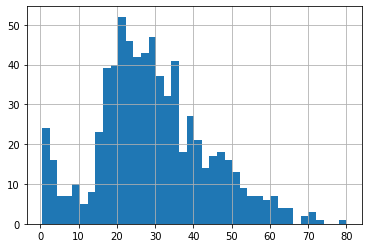

In [11]:
df1['Age'].hist(bins=40)
# df['Age_nana'].hist(bins=40)

# End of distrubution Imputation

In [12]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Pclass','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'])

<AxesSubplot:>

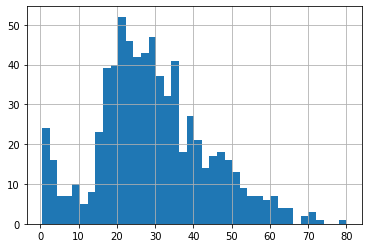

In [13]:
df['Age'].hist(bins=40)

In [14]:
import seaborn as sns

c:\python3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

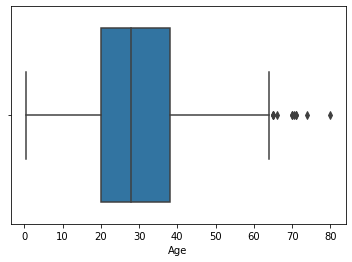

In [15]:
sns.boxplot('Age',data=df)

In [16]:
extreme=df['Age'].mean()+3*df['Age'].std()

In [17]:
extreme

73.27860964406094

In [20]:
def impulse_nan(df,var,median,extreme):
    df[var+"_nan"]=df[var].fillna(extreme)
    df[var]=df[var].fillna(median)

In [21]:
impulse_nan(df,'Age',df['Age'].median(),extreme)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nan
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,35.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,35.0


<AxesSubplot:>

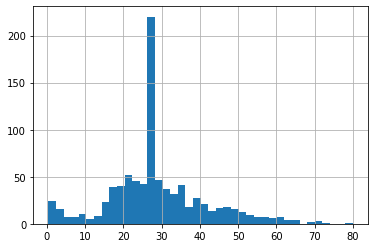

In [23]:
df['Age'].hist(bins=40)

<AxesSubplot:>

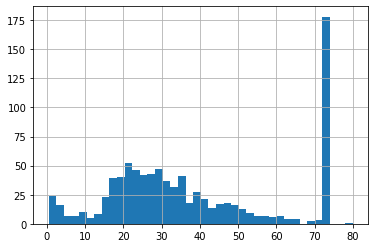

In [25]:
df['Age_nan'].hist(bins=40)

# Arbitary value Imputation 

In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Pclass','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age'])

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [29]:
def impute_nan(df,variable):
    df[variable+"_zeros"]=df[variable].fillna(0)
    df[variable+"_ninty_five"]=df[variable].fillna(95)

In [31]:
impute_nan(df,'Age')

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zeros,Age_ninty_five
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


# Frequent Category impution


In [1]:
import pandas as pd

In [21]:
df=pd.read_csv('train.csv')

In [22]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
pd.read_csv(use_cols=['MSSubClass','SalePrice','YrSold','MoSold','MoSold','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch',
                     'OpenPorchSF','WoodDeckSF','GarageArea','GarageCars','Fireplaces','TotRmsAbvGrd','KitchenAbvGr',
                     'BedroomAbvGr','HalfBath','FullBath',''])

In [24]:
df1=df.select_dtypes(include='number')

In [25]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [42]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [43]:
df.isnull().mean().sort_values(ascending=True)

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
                   ...   
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
Length: 81, dtype: float64

<AxesSubplot:>

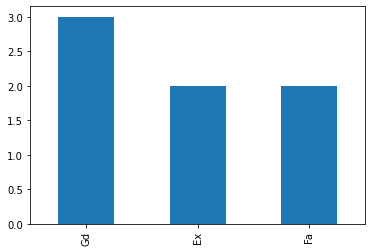

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
df['PoolQC'].value_counts().plot.bar()

In [37]:
df['PoolQC'].value_counts().index[2]

'Fa'

In [36]:
df['PoolQC'].mode()[0]

'Gd'

In [38]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [39]:
def impute_nan(df,variable):
    most_frequent_catagory=df[variable].mode()[0]
    df[variable].fillna(most_frequent_catagory,inplace=True)

In [44]:
for feature in ['FireplaceQu','Fence','Alley','MiscFeature','PoolQC']:
    impute_nan(df,feature)

In [45]:
impute_nan(df,'LotFrontage')

In [46]:
df.isnull().mean()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [47]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Adding a variable to capture NAN

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df1=df.select_dtypes(include='number')

In [5]:
df1.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [13]:
import numpy as np
def impute_nan10(df,variable):
    df[variable+"_nan"]=np.where(df[variable].isnull(),1,0)
    

In [22]:
df1["LotFrontage_nan"]=np.where(df1['LotFrontage'].isnull(),1,0)

C:\Users\SOMASH~1\AppData\Local\Temp/ipykernel_6148/3535004797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["LotFrontage_nan"]=np.where(df1['LotFrontage'].isnull(),1,0)


In [18]:
impute_nan10(df,'LotFrontage')

In [23]:
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1460 non-null   int32  
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   Alley            91 non-null     object 
 7   LotShape         1460 non-null   object 
 8   LandContour      1460 non-null   object 
 9   Utilities        1460 non-null   object 
 10  LotConfig        1460 non-null   object 
 11  LandSlope        1460 non-null   object 
 12  Neighborhood     1460 non-null   object 
 13  Condition1       1460 non-null   object 
 14  Condition2       1460 non-null   object 
 15  BldgType         1460 non-null   object 
 16  HouseStyle       1460 non-null   object 
 17  OverallQual   

In [29]:
frequent=df1['LotFrontage'].value_counts().index[0]
df1['LotFrontage'].fillna(frequent,inplace=True)

c:\python3.9\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,0


In [37]:
df1.loc[df1['LotFrontage_nan']==1,'LotFrontage']

7       60.0
12      60.0
14      60.0
16      60.0
24      60.0
        ... 
1429    60.0
1431    60.0
1441    60.0
1443    60.0
1446    60.0
Name: LotFrontage, Length: 259, dtype: float64

# Handling missing data for catogoriacal variable

### the replace value with new catogorical value

In [38]:
df=pd.read_csv('train.csv')

In [39]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [43]:
df1=df.select_dtypes(include='object').copy()

In [44]:
df1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [45]:
df1.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [50]:
import numpy as np
df1['Alley_nan']=np.where(df1['Alley'].isnull(),"missing",df1['Alley'])

In [51]:
df1.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Alley_nan
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,missing
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,missing
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,missing
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,missing
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,missing


In [59]:
(df1.loc[df1['Alley_nan']=='missing','Alley']).value_counts()

Series([], Name: Alley, dtype: int64)

# One Hot  Encoding

In [60]:
import pandas as pd

In [61]:
df=pd.read_csv('titanic.csv')


In [62]:
df.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [63]:
# one hot encoding
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [64]:
pd.get_dummies(df['Sex'],drop_first=True).head()
# here i dropping first column becoz the 0 1 represents the male other than that will
# be represented by female the mechine understood it

,male
0,1
1,0
2,0
3,0
4,1


In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
pd.get_dummies(df['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


But we cannot use the one hot encoding bcoz if there is large number of column the results in large number columns are produced which may results to "Dimenshion Curse"

### One hot Encoding with many features

In [69]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [70]:
df.head(5)

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [73]:
for i in df.columns:
    print(i,":",df[i].unique())


X0 : ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 : ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 : ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 : ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 : ['d' 'b' 'c' 'a']
X5 : ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 : ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']


In [78]:
top_10=df.X1.value_counts().sort_values(ascending=False).head(10).index

In [81]:
top_10_list=list(df.X1.value_counts().sort_values(ascending=False).head(10))

In [83]:
print(top_10)
print(top_10_list)

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')
[833, 598, 592, 590, 408, 251, 203, 143, 121, 82]


In [85]:
for catagories in top_10:
    df[catagories]=np.where(df['X1']==catagories,1,0)

In [86]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


By doing this you can reducing the size of columns rathan than taking all "features" in each column the top 10 only taken and one hot encoding is performed on it